# Machine Learning Exercise 1 - Linear Regression

This notebook covers a Python-based solution for exercise 1. [Here](ex/ex1.pdf) is detailed descriptions and equations.

In this exercise with need to implement a simple linear regression using gradient descent and apply it to an example problem. We also need to extend the implementation to handle multiple variables.

## 1. Linear regression with one variable

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

## 1.1 Plotting the data

Before starting on any task, it is often useful to understand the data by visualizing it. Here is how we can plot the data in python by using some useful libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
path = os.getcwd() + '/data/ex1/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


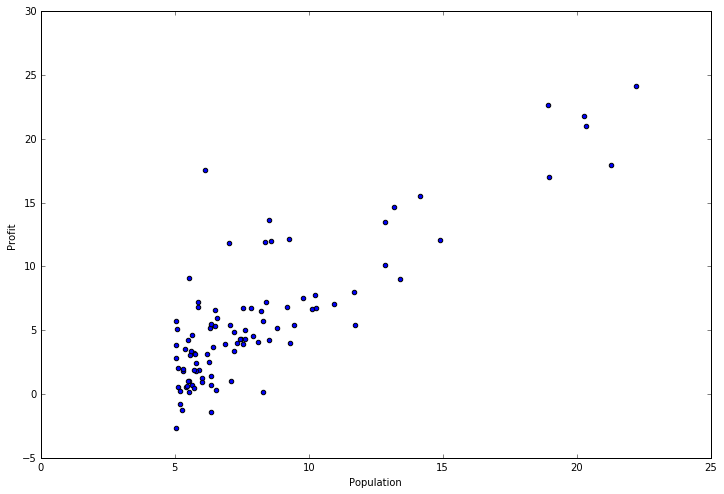

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

## 1.2 Gradient Descent

We will implement linear regression using gradient descent to minimize the cost function. The equations are detailed in the exercise description file.

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2
$$

where the hypothesis $h_\theta(x)$ is given by the linear model:

$$
h_\theta(x) = \theta^Tx
$$

We need to adjust values of $\theta$ to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$
(simultaneously update $\theta_j$ for all $j$)

With each step of gradient decent, the parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost.

First we create a function to compute the cost of a given solution 

In [5]:
def computeCost(X, y, theta):
    inner = (np.dot(X, theta.T) - y) ** 2
    return np.sum(inner) / (2 * len(X))

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [6]:
data.insert(0, 'Ones', 1)

In [7]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy array so we create X, y arrays. We also need to initialize theta array.

In [10]:
X = X.values
y = y.values
theta = np.array([[0,0]])

In [11]:
computeCost(X, y, theta)

32.072733877455676

Now we need to define a function to perform gradient descent on the parameters theta using the update rules above.

In [12]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.zeros(theta.shape)
    cols = int(theta.shape[1])
    
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = np.dot(X, theta.T) - y
        
        diff = (alpha / len(X)) * np.dot(error.T, X)
        theta = theta - diff
        cost[i] = computeCost(X, y, theta)
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

In [13]:
alpha = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [14]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

array([[-3.24140214,  1.1272942 ]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [15]:
computeCost(X, y, g)

4.5159555030789136

Now let's plot the linear model along with the data to visually see how well it fits.

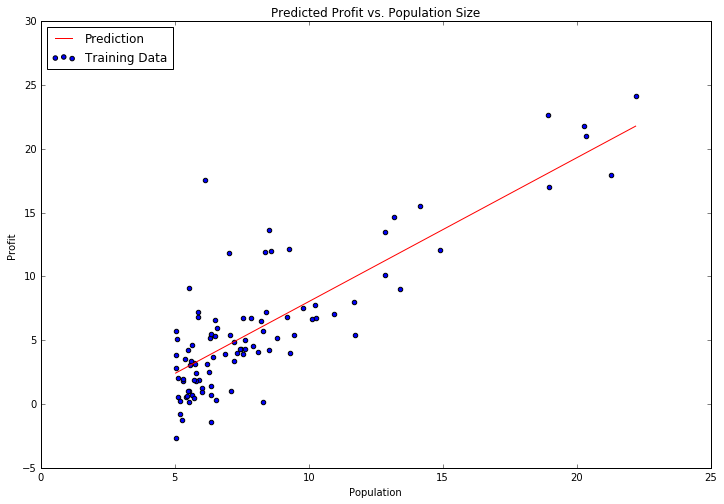

In [16]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] + g[0,1]*x

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## 1.3 Visualizing $J(\theta)$

We can take a quick look at the cost at each training iteration.

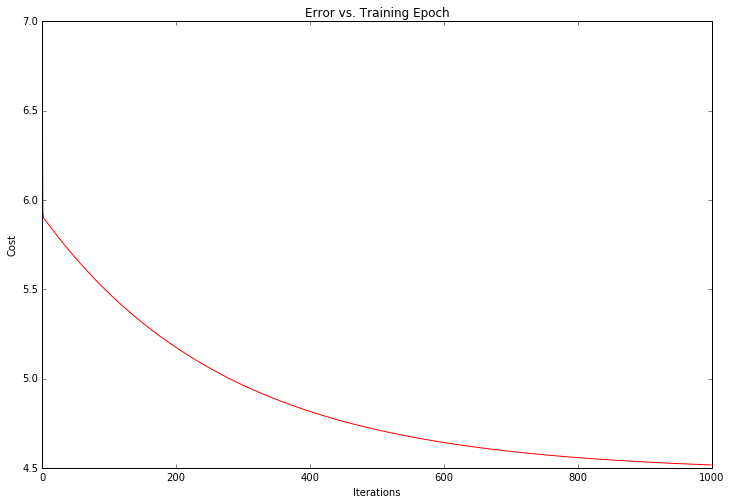

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# 2. Linear regression with multiple variables

In this part, we will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

Let's load the data

In [18]:
path2 = os.getcwd() + '/data/ex1/ex1data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 2.1 Feature Normalization

The first step is the pre-processing step. We need to normalize the features.

There are several ways to normalize features. In is exercise we will use standard deviations normalization. 

In [19]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [20]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1].values
y2 = data2.iloc[:,cols-1:cols].values

theta2 = np.array([[0,0,0]])

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

We can take a quick look at the training progess for this one as well.

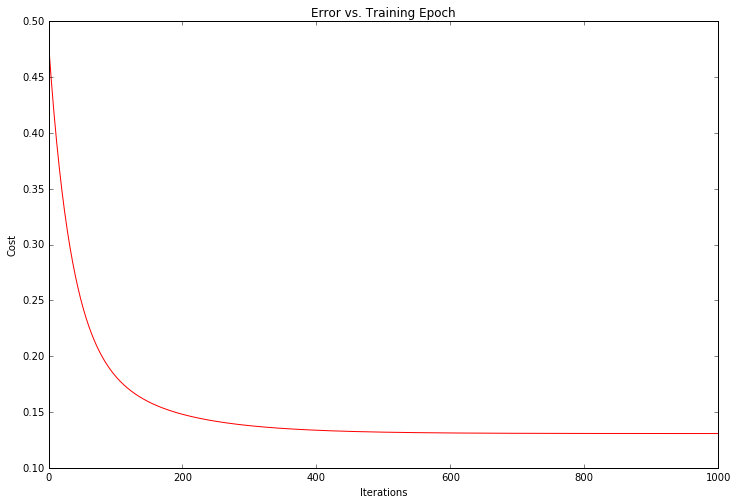

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## 3. Use scikit-learn library

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function. Let's apply scikit-learn's linear regressio algorithm to the data from part 1 and see what it comes up with.

In [22]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

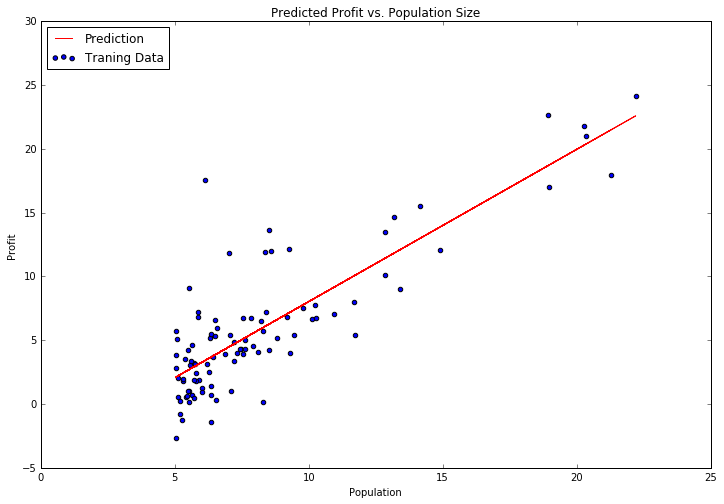

In [23]:
x = np.array(X[:, 1])
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')